# **1. Introduction 👋**

<center><img src="https://images.unsplash.com/photo-1538688525198-9b88f6f53126?auto=format&fit=crop&q=80&w=1374&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D" alt="Furniture Picture" width="600" height="600"></center><br>

## Data Set Problems 🤔

👉Selecting the ideal furniture pieces for your home holds great significance, particularly for new families embarking on the journey of establishing a new residence.However, managing your budget wisely is equally crucial.
In this notebook, I will leverage machine learning algorithms to forecast furniture prices on the Jamia website.

---

## Objectives of Notebook 📌
👉 **This notebook aims to:**
*   Analyze customer data provided in data set (EDA)
*   Build various ML models that can predict whether the person will deposit money or not

👨‍💻 **The machine learning models used in this project are:** 
1. Linear Regression
2. Random Forest Regression
3. Decision Tree Regression
4. Support Vector Regression


---

## Data Set Description 🧾
👉 There are **7 variables** in this data set:
*   **3 categorical** variables,
*   **4 continuous** variables

<br>


# 2. Importing Libraries 📚
👉 Importing libraries that will be used in this notebook.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from category_encoders import TargetEncoder

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# 3. Reading Data Set 👓
👉 After importing libraries, we will also import the dataset that will be used.

In [3]:
df = pd.read_csv("/kaggle/input/furniture-price-prediction/Furniture Price Prediction.csv")

In [4]:
df.shape

(2000, 7)

In [5]:
df.head()

,furniture,type,url,rate,delivery,sale,price
0,Bed side table with storage shelf,Home Decor Center,https://www.jumia.com.eg//ar/home-decor-center...,3.3,172.14,72%,2500.0
1,Bed side table with storage shelf,Modern Home,https://www.jumia.com.eg//ar/modern-home-bedsi...,0.0,172.14,54%,1200.0
2,Modern Zigzag TV Table,Modern Home,https://www.jumia.com.eg//ar/generic-zigzag-tv...,0.0,172.14,18%,1099.0
3,Bedside table with storage shelf,Modern Home,https://www.jumia.com.eg//ar/modern-home-bedsi...,0.0,172.14,58%,1200.0
4,Wall Mounted TV Unit with Cabinet TV Stand Uni...,Modern Home,https://www.jumia.com.eg//ar/modern-home-wall-...,5.0,52.44,54%,1400.0


# 4. Data Exploration 🔍
👉 This section will perform data exploration of "raw" data set that has been imported.

In [6]:
df.describe()

,rate,delivery,price
count,2000.000000,2000.000000,1961.000000
mean,0.743450,142.673285,2910.418195
std,1.611737,139.339128,4002.917206
min,0.000000,10.830000,13.400000
25%,0.000000,52.440000,740.000000
50%,0.000000,172.140000,1900.000000
75%,0.000000,172.140000,4000.000000
max,5.000000,2409.900000,55000.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   furniture  2000 non-null   object 
 1   type       2000 non-null   object 
 2   url        2000 non-null   object 
 3   rate       2000 non-null   float64
 4   delivery   2000 non-null   float64
 5   sale       2000 non-null   object 
 6   price      1961 non-null   float64
dtypes: float64(3), object(4)
memory usage: 109.5+ KB


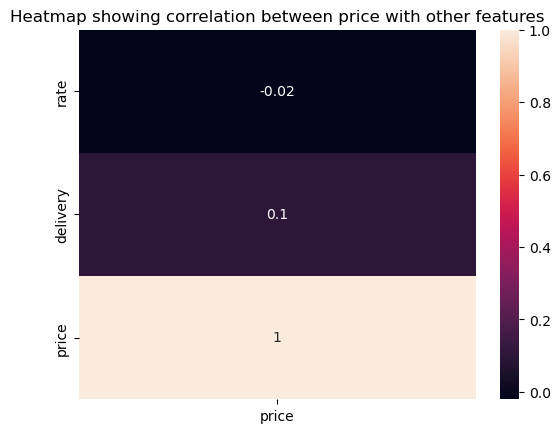

In [8]:
data_corr = df.corr()
plt.title('Heatmap showing correlation between price with other features')
sns.heatmap(data_corr[['price']], annot=True)
plt.show()

In [9]:
df.columns

Index(['furniture', 'type', 'url', 'rate', 'delivery', 'sale', 'price'], dtype='object')

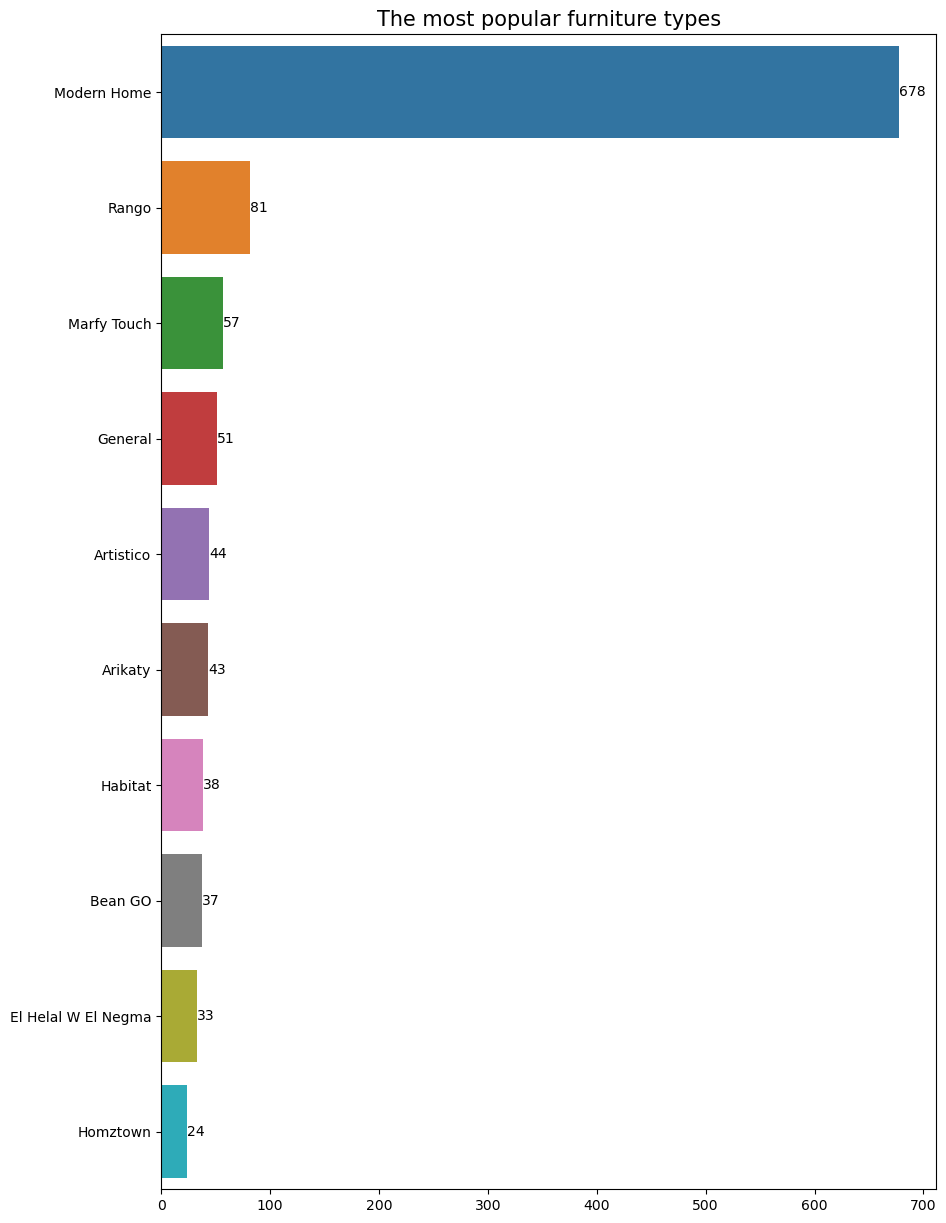

In [10]:
furniture_type = df['type'].value_counts()
plt.figure(figsize=(10,15))
ax = sns.barplot(y = furniture_type.index[:10], x = furniture_type.values[:10])
for i in ax.containers:
    ax.bar_label(i,)
plt.title("The most popular furniture types", size=15)
plt.show()

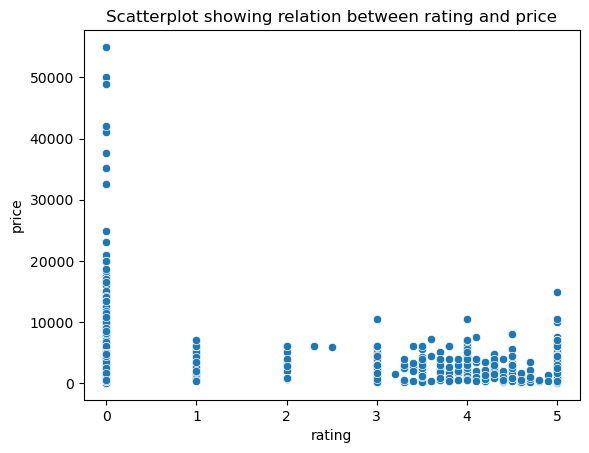

In [11]:
sns.scatterplot(y = df['price'], x = df['rate'])
plt.xlabel('rating')
plt.title('Scatterplot showing relation between rating and price')
plt.show()

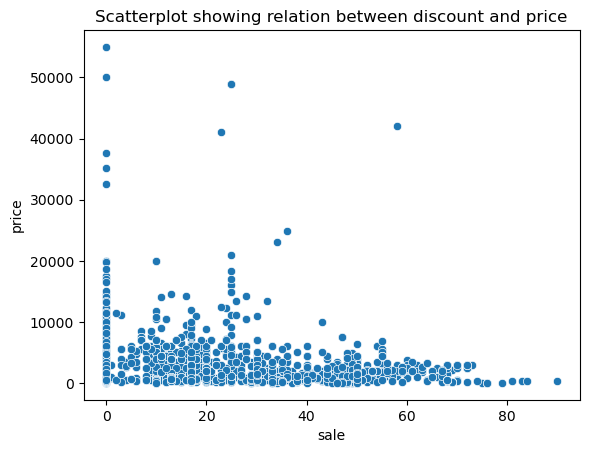

In [12]:
df['sale'] = df['sale'].str.replace('%', '')  # data formatting
df['sale'] = df['sale'].astype(int)
df['sale'].dtype
sns.scatterplot(y = df['price'], x = df['sale'])
plt.title('Scatterplot showing relation between discount and price')
plt.show()

In [13]:
corr_mtrix = df.corr()
corr_mtrix["price"].sort_values(ascending=False)

price       1.000000
delivery    0.101149
rate       -0.020497
sale       -0.178771
Name: price, dtype: float64

In [14]:
df.isna().sum()

furniture     0
type          0
url           0
rate          0
delivery      0
sale          0
price        39
dtype: int64

In [15]:
absent = df[df['price'].isnull()]
df.dropna(inplace=True)

## There are more non-rated furniture than rated furniture

In [16]:

non_rated = df[df['rate'] == 0.0].copy()

In [17]:
non_rated.head()

,furniture,type,url,rate,delivery,sale,price
1,Bed side table with storage shelf,Modern Home,https://www.jumia.com.eg//ar/modern-home-bedsi...,0.0,172.14,54,1200.0
2,Modern Zigzag TV Table,Modern Home,https://www.jumia.com.eg//ar/generic-zigzag-tv...,0.0,172.14,18,1099.0
3,Bedside table with storage shelf,Modern Home,https://www.jumia.com.eg//ar/modern-home-bedsi...,0.0,172.14,58,1200.0
8,Side table with removable tray,Modern Home,https://www.jumia.com.eg//ar/generic-side-tabl...,0.0,172.14,0,900.0
9,Modern Zigzag TV Table,Modern Home,https://www.jumia.com.eg//ar/generic-zigzag-tv...,0.0,172.14,18,1099.0


<AxesSubplot:ylabel='Frequency'>

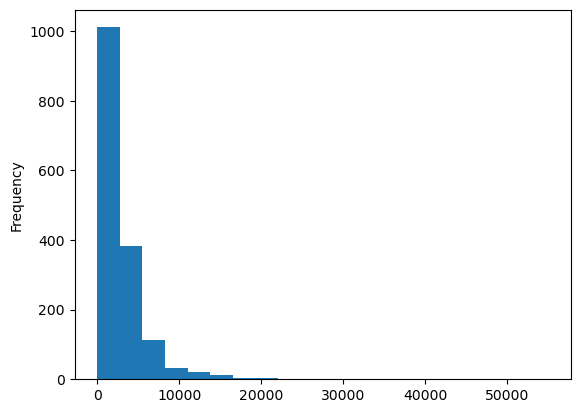

In [18]:
non_rated['price'].plot.hist(bins=20)

In [19]:
rated = df[df['rate'] > 0.0].copy()

<AxesSubplot:ylabel='Frequency'>

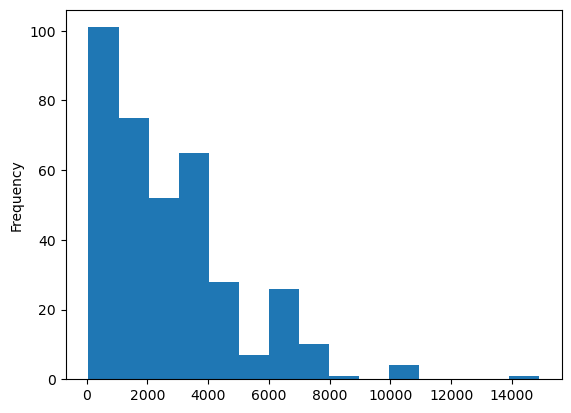

In [20]:
rated['price'].plot.hist(bins=15)

In [21]:
## Count of non_rated vs rated
print(non_rated.shape)
print(rated.shape)

(1591, 7)
(370, 7)


# 5 Data Preprocessing

In [22]:
def data_cleaning(furniture_copy):
    furniture_copy.dropna(subset=["price"], inplace=True)
    furniture_copy.drop(labels="url", axis=1, inplace=True)
    rate_col = furniture_copy[furniture_copy.rate != 0]
    avg_rate = rate_col["rate"].mean()
    furniture_copy["rate"] = furniture_copy["rate"].replace([0], avg_rate)
    furniture_copy["sale"] = furniture_copy["sale"].astype(int)
    
    # categorcal data
    attribs_cat = ["furniture", "type"]
    encoder=TargetEncoder(cols=attribs_cat)
    df = encoder.fit_transform(furniture_copy[attribs_cat],furniture_copy["price"])
    furniture_copy["furniture"] = df["furniture"]
    furniture_copy["type"] = df["type"]
    
    return furniture_copy

In [23]:
df_copy= df.copy()
df_processed = data_cleaning(df_copy)

In [24]:
df_processed

,furniture,type,rate,delivery,sale,price
0,2574.128948,2847.022840,3.300000,172.14,72,2500.0
1,2574.128948,2699.205224,3.972703,172.14,54,1200.0
2,2386.826865,2699.205224,3.972703,172.14,18,1099.0
3,2377.337947,2699.205224,3.972703,172.14,58,1200.0
4,2656.695707,2699.205224,5.000000,52.44,54,1400.0
...,...,...,...,...,...,...
1995,2744.085154,2744.085154,3.972703,656.28,0,1632.0
1996,4021.490155,7944.135893,3.972703,172.14,0,11450.0
1997,2575.590360,1624.668981,3.972703,52.44,0,550.0
1998,4511.148141,4928.389499,3.972703,172.14,9,8495.0


In [25]:
# selecting the most important features
# df = df[['rate', 'delivery', 'sale', 'price']]

In [26]:
df_processed.columns

Index(['furniture', 'type', 'rate', 'delivery', 'sale', 'price'], dtype='object')

## 6 🛠 Models training, hypermarameters tuning phase

In [27]:
x = df_processed.iloc[:, :-1].values
y = df_processed.iloc[:, -1].values

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

In [29]:
def model_evaluate(model, name, plot=True):
    y_pred = model.predict(x_test)
    tit = name + "\nMAE:{}\nMSE:{}".format(mean_absolute_error(y_pred, y_test), mean_squared_error(y_pred, y_test))
    if plot:
        dd = pd.DataFrame(x_test, columns=['furniture', 'type', 'rate', 'delivery', 'sale'])
        dd['price'] = y_pred
        sns.pairplot(dd, x_vars=['furniture', 'type', 'rate', 'delivery', 'sale'], y_vars=['price'])
        plt.suptitle(tit)
        plt.tight_layout()
    else:
        print(tit)

In [30]:
def model_train(model, name):
    model.fit(x_train, y_train)
    model_evaluate(model, name, False)
    return model

In [31]:
lr = LinearRegression()
rfr = RandomForestRegressor(n_estimators=150, max_depth=60)
svr = SVR(kernel='linear', C=0.6)
knr = KNeighborsRegressor(n_neighbors=10)
models = [lr, rfr, svr, knr]
names = ['Linear Regression', 'Random Forest Regressor', 'Support Vector Regression', 'KNeighbors Regressor']

In [32]:
mls = []
for i, j in zip(models, names):
    mls.append(model_train(i, j))
    print()

Linear Regression
MAE:860.5736228419329
MSE:3399544.3988652835

Random Forest Regressor
MAE:343.77749626152
MSE:1684957.6551171588

Support Vector Regression
MAE:783.041777752308
MSE:4057619.7315225033

KNeighbors Regressor
MAE:544.1353486005089
MSE:1977255.2269256997



In [33]:
dt = pd.DataFrame(x_test, columns=['furniture', 'type', 'rate', 'delivery', 'sale'])
dt['price'] = y_test

# Evaluate trained models

### I used Mean Absolute Error(MAE)

![MAE](https://www.codingprof.com/wp-content/uploads/2021/12/Formula_MeanAbsoluteError.png)

### and Mean Squared Error(MSE)

![MSE](https://cdn-media-1.freecodecamp.org/images/hmZydSW9YegiMVPWq2JBpOpai3CejzQpGkNG)

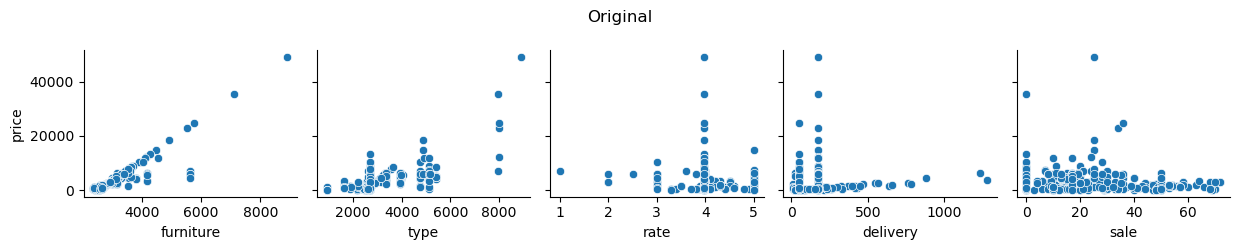

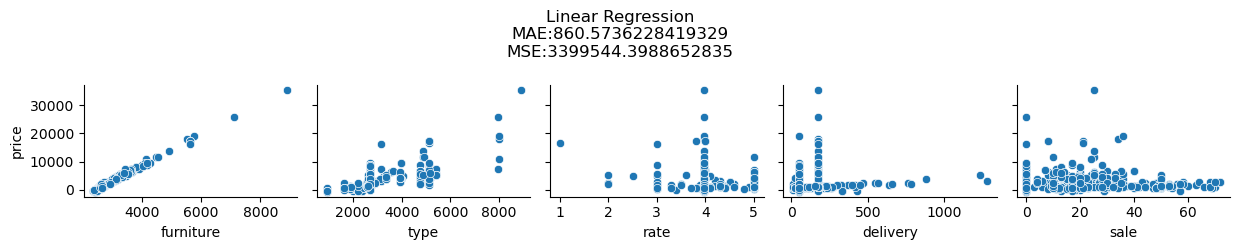

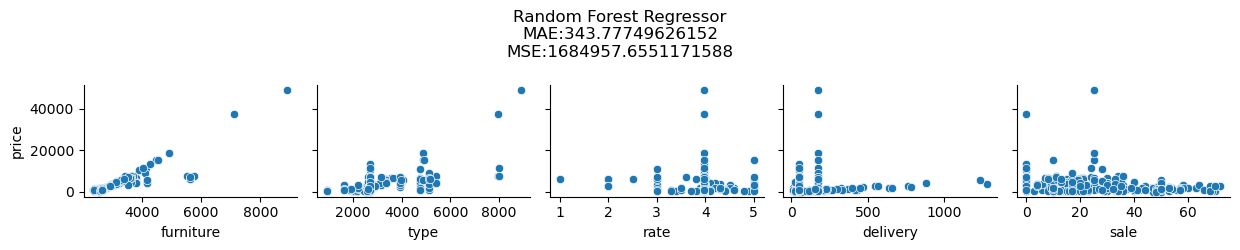

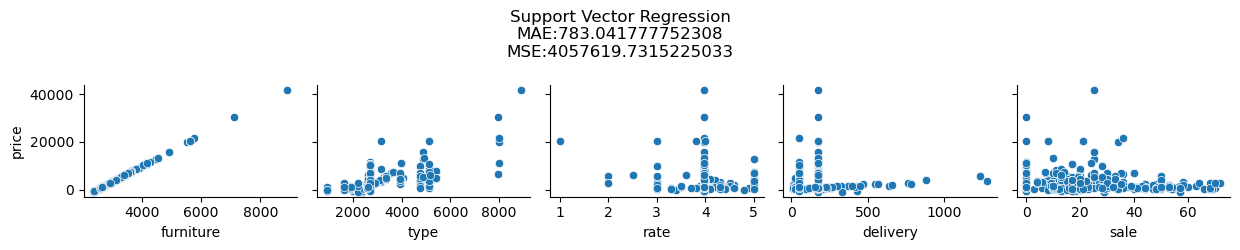

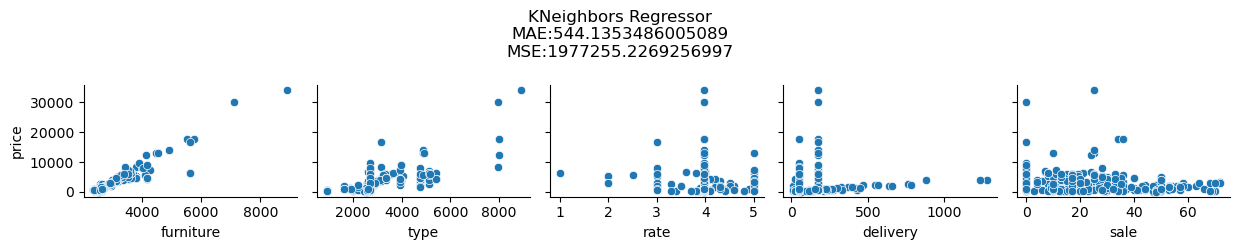

In [34]:
sns.pairplot(dt, x_vars=['furniture', 'type', 'rate', 'delivery', 'sale'], y_vars=['price'])
plt.suptitle("Original")
plt.tight_layout()
for i, j in zip(mls, names):
    model_evaluate(i, j)

## **Conclusion:**

After a rigorous analysis of five different regression models, we have arrived at a clear choice for our project. The Random Forest Regressor outperforms the other models with the lowest values for Mean Absolute Error (MAE) and Mean Squared Error (MSE). This indicates that the Random Forest Regressor provides the most accurate predictions for our regression task.
